In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib as mpl 
%matplotlib inline

This notebook shows calculations of kinetic parameters of biofilm growth

In [2]:
import numpy as np
from scipy.optimize import minimize
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class LADRegression(BaseEstimator, RegressorMixin):
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        
        d = X.shape[1]
        w = np.array([1/8, 1/8, 1/8, 1/8, 2/8, 1/8, 1/16, 1/16])
        mae_loss = lambda coefs: np.mean((w*np.abs(y - X@coefs[:-1] - coefs[-1]))**2)
        *self.coef_, self.intercept_ = minimize(mae_loss, x0=np.array((d+1)*[0.])).x # the heavy lifting
        
        return self
    
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        return X@self.coef_ + self.intercept_

In [3]:
doc_path = '../data/kinetic_modeling_segmentation_results/ratio_calcs_results.csv'
df = pd.read_csv(doc_path)

In [4]:
df

,t,C,M,Ch,S
0,1,0.458656,0.751390,0.000000,98.743004
1,3,3.324679,0.534152,0.000282,96.200515
2,6,2.565730,0.533588,0.000610,96.788330
3,9,39.397724,6.224318,0.071176,53.384587
4,24,48.565392,9.671255,0.016808,41.637667
5,48,55.819514,28.360032,0.039438,16.028959
6,72,35.193669,20.012207,0.028123,43.389893
7,96,47.991756,30.288180,0.048546,21.646635


In [5]:
data = {0: list(df.C),
 1: list(df.M),
 2: list(df.Ch),
 3: list(df.S)}

x = list(df['t'])

In [6]:
names = ['c', 'm', 'ch', 's']

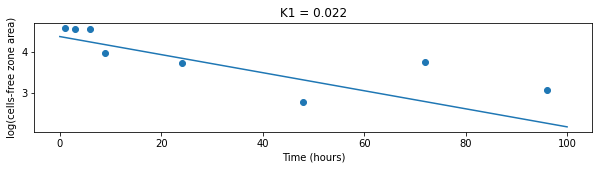

In [7]:
model = LADRegression()
model.fit(X=np.array(x).reshape(-1, 1), y=np.log(np.array(data[3])))
k1 = -np.array(model.coef_)
plt.figure(figsize=(10, 2))
plt.rcParams['font.family'] = 'sans-serif'
plt.title(f'K1 = {round(k1[0], 3)}')
plt.scatter(np.array(x).reshape(-1, 1), np.log(np.array(data[3])))
plt.xlabel('Time (hours)')
plt.ylabel('log(cells-free zone area)')
plt.plot(np.linspace(0, 100, 100), -k1*np.linspace(0, 100, 100)+ model.intercept_)
#plt.savefig('rate_constants_si.png', dpi=300, bbox_inches='tight')

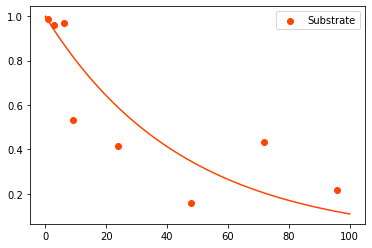

In [8]:
x_all = np.linspace(0, 100, 100)

plt.scatter(x, np.array(data[3])/100, c='orangered', label='Substrate')
plt.plot(x_all, np.exp(-k1*np.array(x_all)), c='orangered')

plt.legend()

In [10]:
def b(k2):
    c_b = (k1/(k2-k1))*(np.exp(-k1*x)-np.exp(-k2*x))
    return ((np.array(data[0])/100-c_b)**2).sum()

In [11]:
k2 = minimize(b, 0.015).x[0]

In [12]:
mpl.style.use('seaborn')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 15

In [16]:
k1 = k1[0]

In [17]:
gamma = k2/k1

In [18]:

np.log(gamma)/((gamma - 1)*(k1))

61.62970236551067

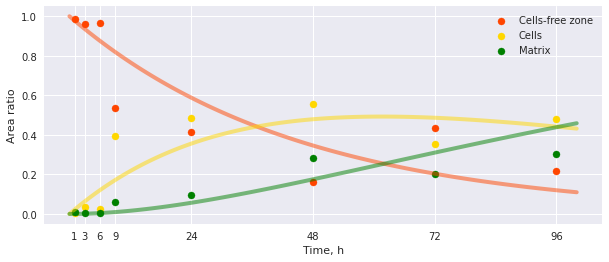

In [20]:
x_all = np.linspace(0, 100, 100)

plt.figure(figsize=(10, 4))

plt.plot(x_all, np.exp(-k1*np.array(x_all)), c='orangered', linewidth=4, alpha=0.5)
plt.scatter(x, np.array(data[3])/100, c='orangered', label='Cells-free zone', marker='o', s=50)


plt.plot(x_all, (k1/(k2-k1))*(np.exp(-k1*x_all)-np.exp(-k2*x_all)), c='gold', linewidth=4, alpha=0.5)
plt.scatter(x, np.array(data[0])/100, c='gold', label='Cells', marker='o', s=50)

plt.plot(x_all, -(np.exp(-k2*x_all)*k1 - np.exp(-k1*x_all)*k2)/(k1 - k2)+1, c='green', linewidth=4, alpha=0.5)
plt.scatter(x, np.array(data[1])/100, c='green', label='Matrix', marker='o', s=50)

plt.xlabel('Time, h')
plt.ylabel('Area ratio')
plt.legend()

plt.xticks([1, 3, 6, 9, 24, 48, 72, 96])
plt.show()
#plt.savefig('kinetics.png', dpi=300, bbox_inches='tight')

In [21]:
k1

0.022107388638073225

In [22]:
k2

0.011493477312332467